<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E5%8F%8E%E7%A9%AB%E9%87%8F%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan
!pip install fbprophet

In [50]:
import pandas as pd
from fbprophet import Prophet

In [122]:
years = [2018, 2019, 2020]
df = pd.DataFrame()
for year in years:
    _df = pd.read_csv(f'/content/syukaku{year}.csv', encoding="cp932")
    df = pd.concat([df, _df], axis=0)

In [125]:
df.tail()

,DATE,出荷実績
361,2020/12/27,0
362,2020/12/28,0
363,2020/12/29,0
364,2020/12/30,0
365,2020/12/31,0


In [126]:
datas = []

for index,datum in df.iterrows():
    count = datum['出荷実績']
    data = f'{count}'

    datas.append(data)



In [127]:
datas[:3]


['0', '0', '0']

In [128]:
df['y'] = datas

In [129]:
df.head()

,DATE,出荷実績,y
0,2018/1/1,0,0
1,2018/1/2,0,0
2,2018/1/3,0,0
3,2018/1/4,0,0
4,2018/1/5,0,0


In [130]:
dates = []

for index, datum in df.iterrows():
    date = datum['DATE']
    str_date = f'{date}'
    dates.append(date)
    


In [131]:
dates[:3]

['2018/1/1', '2018/1/2', '2018/1/3']

In [132]:
df['ds'] = dates

In [133]:
df.head()

,DATE,出荷実績,y,ds
0,2018/1/1,0,0,2018/1/1
1,2018/1/2,0,0,2018/1/2
2,2018/1/3,0,0,2018/1/3
3,2018/1/4,0,0,2018/1/4
4,2018/1/5,0,0,2018/1/5


In [134]:
model = Prophet()

In [135]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [136]:
future = model.make_future_dataframe(24*365, freq='H')
future.tail

<bound method NDFrame.tail of                       ds
0    2018-01-01 00:00:00
1    2018-01-02 00:00:00
2    2018-01-03 00:00:00
3    2018-01-04 00:00:00
4    2018-01-05 00:00:00
...                  ...
9851 2021-12-30 20:00:00
9852 2021-12-30 21:00:00
9853 2021-12-30 22:00:00
9854 2021-12-30 23:00:00
9855 2021-12-31 00:00:00

[9856 rows x 1 columns]>

In [139]:
forecast = model.predict(future)

In [140]:
import matplotlib.pyplot as plt

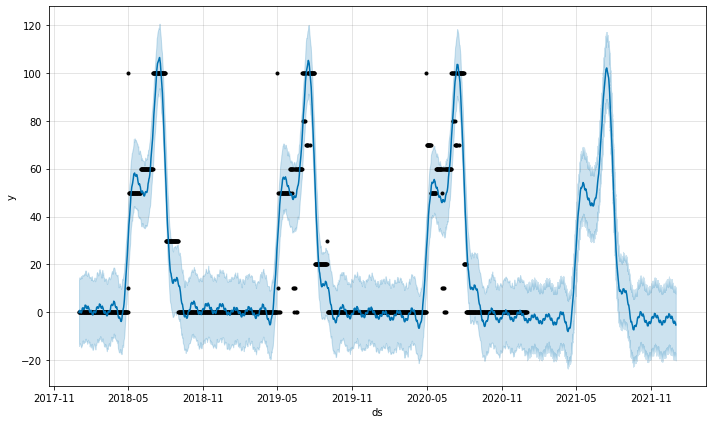

In [144]:
model.plot(forecast)
plt.show()